<a href="https://colab.research.google.com/github/LucasMirandaD/Gestion-de-Datos/blob/main/LM_Competencia_Ausentismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ayuda -> Caso_Ausentismo_de_Turnos_2023

In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier




from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [110]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/datos_train.csv',delimiter=',',decimal='.')

# Preprocesamiento

## Descripccion de datos

In [111]:
datos.head(2)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,F,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,40,62,0,1,0,0,0,0,0
1,2,55326,29080,M,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,40,56,0,0,0,0,0,0,0


In [112]:
datos.shape

(86000, 15)

In [113]:
datos.ausente.value_counts()

0    68230
1    17770
Name: ausente, dtype: int64

<Axes: >

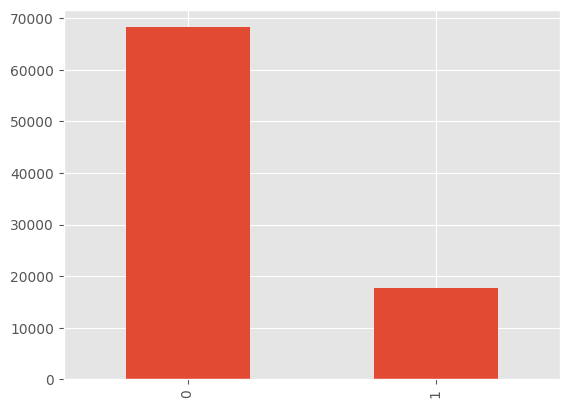

In [114]:
datos.ausente.value_counts().plot(kind='bar')

In [115]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


In [116]:
datos.describe()

,id,id_paciente,id_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
count,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000
mean,43000.500000,31123.719977,46625.973116,42.601547,36.982860,0.098372,0.196651,0.071151,0.029837,0.022291,0.289302,0.206628
std,24826.205912,17964.921826,27585.167343,22.416531,23.100174,0.297819,0.397469,0.257079,0.170139,0.160967,0.453441,0.404889
min,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21500.750000,15614.000000,23087.750000,26.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43000.500000,31018.500000,45761.500000,40.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64500.250000,46589.000000,69626.250000,61.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,86000.000000,62299.000000,110522.000000,81.000000,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


## Clasificacion de variables

In [117]:
# # Convertir las variables a categóricas
# datos['sexo'] = datos['sexo'].astype('category')
# datos['plan_social'] = datos['plan_social'].astype('category')
# datos['hipertension'] = datos['hipertension'].astype('category')
# datos['diabetes'] = datos['diabetes'].astype('category')
# datos['alcoholismo'] = datos['alcoholismo'].astype('category')
# datos['discapacidades'] = datos['discapacidades'].astype('category')
# datos['sms_recibidos'] = datos['sms_recibidos'].astype('category')
# datos['ausente'] = datos['ausente'].astype('category')
# datos['id_paciente'] = datos['id_paciente'].astype('category')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


## Manipulacion de tipos

In [118]:
datos['sexo'] = datos['sexo'].replace({'F': 0, 'M': 1})

In [119]:
# Extraer el día y el mes de la columna de fecha
datos['dia_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno']).dt.day
datos['mes_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno']).dt.month

datos['dia_turno'] = pd.to_datetime(datos['dia_turno']).dt.day
datos['mes_turno'] = pd.to_datetime(datos['dia_turno']).dt.month

# Calcular la diferencia de días entre reserva y turno
datos['dif_dias_reserva'] = datos['dia_turno'] - datos['dia_reserva_turno']
datos['dif_meses_reserva'] = datos['mes_turno'] - datos['mes_reserva_turno']


Normalizacion de datos numericos

In [120]:
# # Seleccionar solo las características numéricas
# numeric_features = ['edad', 'sms_recibidos', 'dif_dias_reserva'] #,'discapacidades'
# numeric_data = datos[numeric_features]

# # Crear el objeto del escalador
# scaler = MinMaxScaler()

# # Ajustar y transformar los datos
# normalized_data = scaler.fit_transform(numeric_data)

# # Crear un nuevo DataFrame con los datos normalizados
# normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# # Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
# datos[numeric_features] = normalized_df

# # # Ver los datos normalizados
# # print(datos)

Normalizacion de la fecha

In [121]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# datos[columnas_fecha] = datos[columnas_fecha].apply(normalize_column)

# # print(datos)


In [122]:
datos.head(10)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente,mes_reserva_turno,mes_turno,dif_dias_reserva,dif_meses_reserva
0,1,30846,29333,0,12,12,40,62,0,1,0,0,0,0,0,1,1,0,0
1,2,55326,29080,1,12,12,40,56,0,0,0,0,0,0,0,1,1,0,0
2,3,15723,29116,0,12,12,46,62,0,0,0,0,0,0,0,1,1,0,0
3,4,9019,29300,0,12,12,55,8,0,0,0,0,0,0,0,1,1,0,0
4,5,23942,29074,0,12,12,40,56,0,1,1,0,0,0,0,1,1,0,0
5,6,47044,21107,0,10,12,59,76,0,1,0,0,0,0,0,1,1,2,0
6,7,57940,22504,0,10,12,26,23,0,0,0,0,0,0,1,1,1,2,0
7,8,14327,22617,0,10,12,26,39,0,0,0,0,0,0,1,1,1,2,0
8,9,37461,26345,0,12,12,2,21,0,0,0,0,0,0,0,1,1,0,0
9,10,42681,21988,0,10,12,13,19,0,0,0,0,0,0,0,1,1,2,0


## Reordenamiento de columnas

In [123]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'id_paciente', 'sexo', 'edad', 'plan_social', 'dif_dias_reserva', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Reordenar las columnas utilizando reindex
datos = datos.reindex(columns=new_columns)

# Mostrar los datos actualizados
datos.head(5)

,id,id_turno,cod_barrio,dia_reserva_turno,dia_turno,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,29333,40,12,12,30846,0,62,0,0,1,0,0,0,0,0
1,2,29080,40,12,12,55326,1,56,0,0,0,0,0,0,0,0
2,3,29116,46,12,12,15723,0,62,0,0,0,0,0,0,0,0
3,4,29300,55,12,12,9019,0,8,0,0,0,0,0,0,0,0
4,5,29074,40,12,12,23942,0,56,0,0,1,1,0,0,0,0


## Armado Matriz x e y

In [124]:
X=datos.iloc[:,5:15] #antes --> X=datos.iloc[:,0:11] incluia el id
X.head(5)

,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,30846,0,62,0,0,1,0,0,0,0
1,55326,1,56,0,0,0,0,0,0,0
2,15723,0,62,0,0,0,0,0,0,0
3,9019,0,8,0,0,0,0,0,0,0
4,23942,0,56,0,0,1,1,0,0,0


In [125]:
y=datos.iloc[:,15:16]
y.head(7)

,ausente
0,0
1,0
2,0
3,0
4,0
5,0
6,1


## Submuestreo + Sobremuestreo

In [126]:
# Submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=80)
X_under, y_under = under_sampler.fit_resample(datos.drop('ausente', axis=1), datos['ausente'])

# Sobre muestreo de la clase minoritaria utilizando el subconjunto submuestreado
over_sampler = SMOTE(random_state=80)
X_balanced, y_balanced = over_sampler.fit_resample(X_under, y_under)


In [127]:
# X = X_balanced.iloc[:,6:14]
# X_balanced.head(5)

In [128]:
# y = y_balanced

<Axes: >

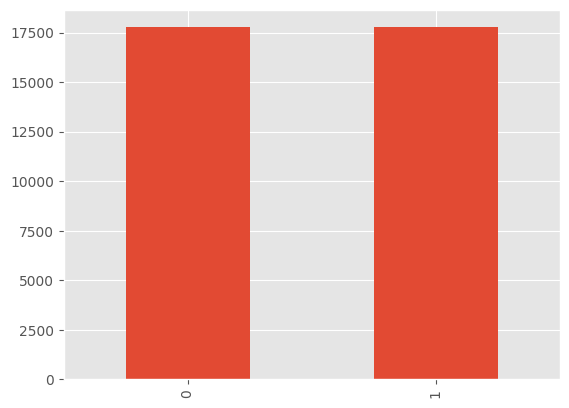

In [129]:
muestraDat = pd.concat([X_balanced, y_balanced], axis=1)
muestraDat.ausente.value_counts().plot(kind='bar')

**Submuestreo de la clase mayoritaria**

**NearMiss**

In [130]:
# Aplica NearMiss para realizar el submuestreo de la clase mayoritaria
nm = NearMiss()
X_subsampled, y_subsampled = nm.fit_resample(X, y)

# Crea un nuevo DataFrame con los datos submuestreados
datos_subsampled = pd.concat([X_subsampled, y_subsampled], axis=1)

In [131]:
X=X_subsampled #NearMiss

In [132]:
y=y_subsampled #NearMiss

**Undersampler** Para equilibrar clases



In [133]:
# Aplicar submuestreo solo al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=80)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# datos_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [134]:
# X=X_resampled #undersampler
# X.head(2)

In [135]:
# y=y_resampled #undersampler
# y.head(2)

## **Division del conjunto de datos**

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=80)

In [137]:
# # NearMiss
# # X_train=X_train_subsampled
# # y_train=y_train_subsampled

# # UnderSampler
# X_train=X_train_resampled
# y_train=y_train_resampled

<Axes: >

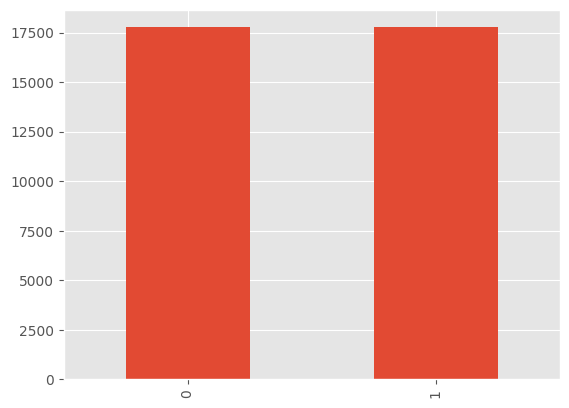

In [138]:
datos_subsampled.ausente.value_counts().plot(kind='bar')

# Clasificadores

In [78]:

modelo = DecisionTreeClassifier()
modeloLR = LogisticRegression()
modelo_knn = KNeighborsClassifier()
modelo_rf = RandomForestClassifier()
modelo_gnb = GaussianNB()
modelo_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss')



## GaussianNB

In [32]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_gnb=GridSearchCV(modelo_gnb,param_grid,cv=7, scoring='f1_macro')
grid_gnb.fit(X_train,y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
modelo_gnb_final = grid_gnb.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_gnb = modelo_gnb_final.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## KNeighborsClassifier

In [33]:
# Definir los hiperparámetros a ajustar
parametros = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Realizar la búsqueda grid
grid_search = GridSearchCV(modelo_knn, parametros, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
modelo_knn_final = grid_search.best_estimator_
mejores_hiperparametros = grid_search.best_params_

# Realizar predicciones con el mejor modelo
y_pred_knn = modelo_knn_final.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

## Random Forest

In [34]:
# Diccionario de hiperparámetros para la calibración del modelo
rf_param = {
    # 'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'n_estimators': [10,15,20],
    'criterion': ['gini', 'entropy'],  # Criterio de selección de características
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

In [35]:
# Calibración del modelo con GridSearchCV
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_rf = GridSearchCV(
    modelo_rf,
    param_grid=rf_param,
    cv=kfold,
    verbose=1
)
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 15, 20]},
             verbose=1)

In [36]:
# Obtener los mejores parámetros y el mejor estimador
best_params_rf = grid_rf.best_params_
best_estimator_rf = grid_rf.best_estimator_

In [37]:
# Entrenar el modelo final con los mejores parámetros
modelo_rf_final = best_estimator_rf.fit(X_train, y_train)

<ipython-input-37-26911fa12bc9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf_final = best_estimator_rf.fit(X_train, y_train)


In [38]:
# Validación del modelo final
y_pred_rf = modelo_rf_final.predict(X_test)

In [39]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión (Random Forest):\n", conf_matrix_rf)

Matriz de confusión (Random Forest):
 [[3657 1638]
 [1420 3947]]


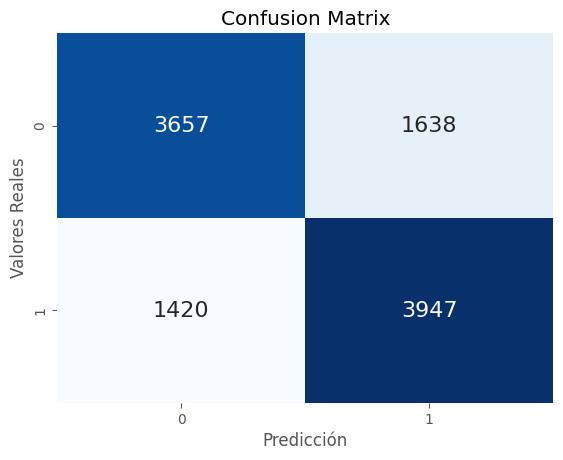

In [40]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_rf, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [41]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.713187019320953
Precision (Random Forest): 0.7067144136078782
Recall (Random Forest): 0.7354201602384945
F1 Score (Random Forest): 0.720781592403214
Kappa score:  0.4261894149600127


In [42]:
grid_rf.best_score_

0.7168979982080451

## DecisionTreeClasifier

In [43]:
tree_param = {
    'criterion': ['entropy','gini'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [44]:
grid = GridSearchCV(
    modelo,
    param_grid= tree_param,
    # cv=10,
    cv=kfold,
    # scoring='f1',
    verbose=1
)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=1)

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5}

In [46]:
grid.best_score_

0.7071311818239411

In [47]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)

In [48]:
modelo_f=grid.best_estimator_

Prediccion

In [49]:
y_pred_Tree = modelo_f.predict(X_test)

In [50]:
kappa = cohen_kappa_score(y_test, y_pred_Tree)
print("Kappa score: ", kappa)

Kappa score:  0.4300442292524784


In [51]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_Tree)
precision_rf = precision_score(y_test, y_pred_Tree)
recall_rf = recall_score(y_test, y_pred_Tree)
f1_score_rf = f1_score(y_test, y_pred_Tree)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)

Accuracy (Random Forest): 0.7149690489589196
Precision (Random Forest): 0.7245370370370371
Recall (Random Forest): 0.6998323085522639
F1 Score (Random Forest): 0.7119704293431902


In [52]:
# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_Tree)
print("Matriz de confusión (Random Forest):\n", conf_matrix_tree)

Matriz de confusión (Random Forest):
 [[3867 1428]
 [1611 3756]]


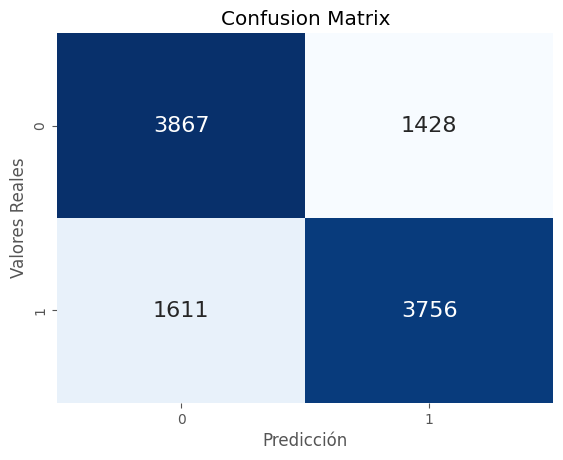

In [53]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_Tree, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [54]:

# Obtener la importancia de las características
feature_importances = modelo_f.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df.head())

# Seleccionar solo las características más importantes
selected_features = feature_importance_df['Feature'].values[:5]  # seleccionar las 5 características más importantes

# Filtrar el conjunto de datos original con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


            Feature  Importance
4  dif_dias_reserva    0.870381
2              edad    0.075446
0       id_paciente    0.027226
9     sms_recibidos    0.012908
1              sexo    0.006845


## LogisticRegression

In [55]:
# Crear el modelo de Logistic Regression
model_lr = LogisticRegression(solver='liblinear') # 

# Definir los hiperparámetros a ajustar
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='roc_auc', cv=5)
grid_lr.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
final_model_lr = grid_lr.best_estimator_

# Realizar predicciones en los datos de prueba utilizando el mejor modelo
y_pred_lr = final_model_lr.predict(X_test)

# Probabilidades de predicción
y_pred_proba = final_model_lr.predict_proba(X_test)[:, 1]



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [56]:
# Evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      5295
           1       0.66      0.43      0.52      5367

    accuracy                           0.60     10662
   macro avg       0.61      0.60      0.59     10662
weighted avg       0.61      0.60      0.59     10662



In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[4088 1207]
 [3074 2293]]


In [58]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.5774376092277272


In [59]:
# Mejores hiperparámetros encontrados por Grid Search
print("Best Parameters:", grid_lr.best_params_)

print("Best Score:", grid_lr.best_score_)

kappa = cohen_kappa_score(y_test, y_pred_lr)
print("Kappa score: ", kappa)

Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Score: 0.5743612653594431
Kappa score:  0.19881941945363946


In [60]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

print("Accuracy (DecisionTreeClasifier):", accuracy_lr)
print("Precision (DecisionTreeClasifier):", precision_lr)
print("Recall (DecisionTreeClasifier):", recall_rlr)
print("F1 Score (DecisionTreeClasifier):", f1_score_lr)

Accuracy (DecisionTreeClasifier): 0.5984805852560495
Precision (DecisionTreeClasifier): 0.6551428571428571
Recall (DecisionTreeClasifier): 0.427240544065586
F1 Score (DecisionTreeClasifier): 0.5171986015563325


In [61]:
# Matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión (Random Forest):\n", conf_matrix_lr)

Matriz de confusión (Random Forest):
 [[4088 1207]
 [3074 2293]]


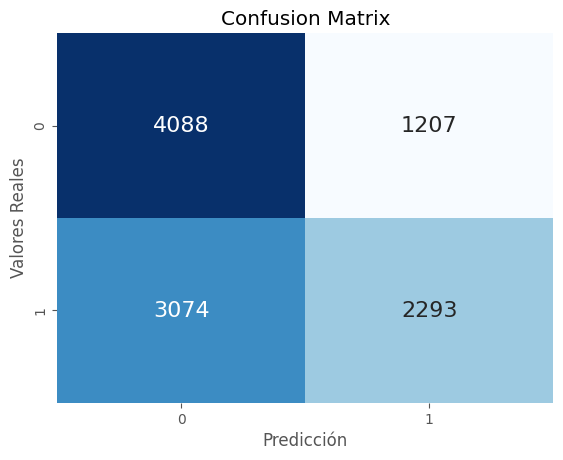

In [62]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_lr, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

## Clasificador por votacion


In [175]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
   
    estimators = [ ('lr', final_model_lr),
                   ('rf', modelo_rf_final),
                   ('Tree', modelo_f),
                  #  ('knn', modelo_knn_final), 
                   ('gnb', modelo_gnb_final),
                   ('xgboost', modelo_xgb)],
    # ],
                   voting='hard')


voting_clf.fit(X_train,y_train)
y_pred_vc = voting_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [176]:
# Matriz de confusión
conf_matrix_vc = confusion_matrix(y_test, y_pred_vc)
print("Matriz de confusión (VotingClassifier):\n", conf_matrix_vc)

Matriz de confusión (VotingClassifier):
 [[3997 1298]
 [1731 3636]]


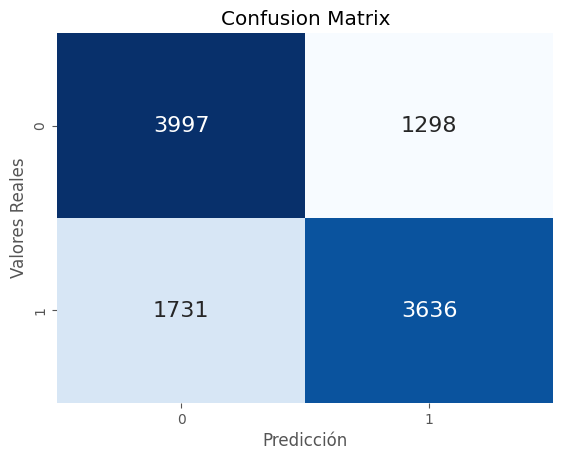

In [177]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_vc, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Leer nuevas instancias a predecir

In [185]:
nuevas_instancias_pd= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/nuevas_instancias_a_predecir.csv',delimiter=',',decimal='.')

In [186]:
nuevas_instancias_pd.shape

(24527, 14)

In [187]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].replace({'F': 0, 'M': 1})

In [188]:
nuevas_instancias_pd.head(5)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,62227,4649,1,2019-07-15 17:14:49+00:00,2019-09-14 00:00:00+00:00,39,15,0,0,0,0,0,1
1,2,43027,12844,1,2019-08-02 07:29:05+00:00,2019-09-21 00:00:00+00:00,39,15,0,0,0,0,0,1
2,3,36016,97746,1,2019-09-14 08:41:06+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0
3,4,60526,7833,0,2019-07-25 17:47:25+00:00,2019-09-14 00:00:00+00:00,39,11,0,0,0,0,0,1
4,5,2706,97985,0,2019-09-14 09:25:07+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0


In [189]:
# nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].astype('category')
# nuevas_instancias_pd['edad'] = nuevas_instancias_pd['edad'].astype('category')
# nuevas_instancias_pd['plan_social'] = nuevas_instancias_pd['plan_social'].astype('category')
# nuevas_instancias_pd['hipertension'] = nuevas_instancias_pd['hipertension'].astype('category')
# nuevas_instancias_pd['diabetes'] = nuevas_instancias_pd['diabetes'].astype('category')
# nuevas_instancias_pd['alcoholismo'] = nuevas_instancias_pd['alcoholismo'].astype('category')
# nuevas_instancias_pd['discapacidades'] = nuevas_instancias_pd['discapacidades'].astype('category')
# nuevas_instancias_pd['sms_recibidos'] = nuevas_instancias_pd['sms_recibidos'].astype('category')
# nuevas_instancias_pd['id_paciente'] = nuevas_instancias_pd['id_paciente'].astype('category')


# nuevas_instancias_pd['ausente'] = nuevas_instancias_pd['ausente'].astype('category')


In [190]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'id_paciente', 'sexo', 'edad', 'plan_social', 'dif_dias_reserva', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# # Convertir las columnas de fecha en formato datetime
# nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno'])
# nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno'])

# # Extraer el mes y el día de las columnas de fecha
# nuevas_instancias_pd['mes_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.month
# nuevas_instancias_pd['dia_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.day

# nuevas_instancias_pd['mes_turno'] = nuevas_instancias_pd['dia_turno'].dt.month
# nuevas_instancias_pd['dia_turno'] = nuevas_instancias_pd['dia_turno'].dt.day

In [191]:
# Extraer el día y el mes de la columna de fecha
nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno']).dt.day
nuevas_instancias_pd['mes_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno']).dt.month

nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno']).dt.day
nuevas_instancias_pd['mes_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno']).dt.month

# Calcular la diferencia de días entre reserva y turno
nuevas_instancias_pd['dif_dias_reserva'] = nuevas_instancias_pd['dia_turno'] - nuevas_instancias_pd['dia_reserva_turno']
nuevas_instancias_pd['dif_meses_reserva'] = nuevas_instancias_pd['mes_turno'] - nuevas_instancias_pd['mes_reserva_turno']

In [192]:
# Reordenar las columnas utilizando reindex
nuevas_instancias_pd = nuevas_instancias_pd.reindex(columns=new_columns)
nuevas_instancias_pd = nuevas_instancias_pd.iloc[:,5:15]

nuevas_instancias_pd.tail(2)

,id_paciente,sexo,edad,plan_social,dif_dias_reserva,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
24525,45961,0,38,0,10,0,0,0,0,1
24526,52484,0,54,0,10,0,0,0,0,1


Normalizacion de numericos

In [193]:
# # Seleccionar solo las características numéricas
# numeric_features = ['edad', 'sms_recibidos', 'dif_dias_reserva'] #,'discapacidades'
# numeric_data = nuevas_instancias_pd[numeric_features]

# # Crear el objeto del escalador
# scaler = MinMaxScaler()

# # Ajustar y transformar los datos
# normalized_data = scaler.fit_transform(numeric_data)

# # Crear un nuevo DataFrame con los datos normalizados
# normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# # Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
# nuevas_instancias_pd[numeric_features] = normalized_df
# nuevas_instancias_pd.head(3)
# # # Ver los datos normalizados
# # print(nuevas_instancias_pd)

Normalizacion de Fecha

In [194]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# nuevas_instancias_pd[columnas_fecha] = nuevas_instancias_pd[columnas_fecha].apply(normalize_column)

# # print(nuevas_instancias_pd)

Para XGBoost

In [195]:
# Crear el objeto DMatrix para las nuevas instancias
dnew = xgb.DMatrix(nuevas_instancias_pd)

# Metricas

 XGBoost

In [196]:
# # Otras métricas de evaluación
# accuracy_xg = accuracy_score(y_test, y_pred_xg)
# precision_xg = precision_score(y_test, y_pred_xg)
# recall_xg = recall_score(y_test, y_pred_xg)
# f1_score_xg = f1_score(y_test, y_pred_xg)
# kappa_xg = cohen_kappa_score(y_test, y_pred_xg)


# print("Accuracy (GaussianNB):", accuracy_xg)
# print("Precision (GaussianNB):", precision_xg)
# print("Recall (GaussianNB):", recall_xg)
# print("F1 Score (GaussianNB):", f1_score_xg)
# print("Kappa score: ", kappa_xg)

GNB

In [197]:
# Otras métricas de evaluación
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_score_gnb = f1_score(y_test, y_pred_gnb)
kappa_gnb = cohen_kappa_score(y_test, y_pred_gnb)


print("Accuracy (GaussianNB):", accuracy_gnb)
print("Precision (GaussianNB):", precision_gnb)
print("Recall (GaussianNB):", recall_gnb)
print("F1 Score (GaussianNB):", f1_score_gnb)
print("Kappa score: ", kappa_gnb)

Accuracy (GaussianNB): 0.6778277996623523
Precision (GaussianNB): 0.815068493150685
Recall (GaussianNB): 0.4656232532140861
F1 Score (GaussianNB): 0.5926716471006759
Kappa score:  0.3574990313532098


RF

In [198]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.713187019320953
Precision (Random Forest): 0.7067144136078782
Recall (Random Forest): 0.7354201602384945
F1 Score (Random Forest): 0.720781592403214
Kappa score:  0.4261894149600127


DTC

In [199]:
# Otras métricas de evaluación
accuracy_dtc = accuracy_score(y_test, y_pred_Tree)
precision_dtc = precision_score(y_test, y_pred_Tree)
recall_dtc = recall_score(y_test, y_pred_Tree)
f1_score_dtc = f1_score(y_test, y_pred_Tree)
kappa_dtc = cohen_kappa_score(y_test, y_pred_Tree)


print("Accuracy (DecisionTreeClassifier):", accuracy_rf)
print("Precision (DecisionTreeClassifier):", precision_rf)
print("Recall (DecisionTreeClassifier):", recall_rf)
print("F1 Score (DecisionTreeClassifier):", f1_score_rf)
print("Kappa score: ", kappa_dtc)

Accuracy (DecisionTreeClassifier): 0.713187019320953
Precision (DecisionTreeClassifier): 0.7067144136078782
Recall (DecisionTreeClassifier): 0.7354201602384945
F1 Score (DecisionTreeClassifier): 0.720781592403214
Kappa score:  0.4300442292524784


LR

In [200]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)

print("Accuracy (LogisticRegression):", accuracy_lr)
print("Precision (LogisticRegression):", precision_lr)
print("Recall (LogisticRegression):", recall_rlr)
print("F1 Score (LogisticRegression):", f1_score_lr)
print("Kappa score: ", kappa_lr)

Accuracy (LogisticRegression): 0.5984805852560495
Precision (LogisticRegression): 0.6551428571428571
Recall (LogisticRegression): 0.427240544065586
F1 Score (LogisticRegression): 0.5171986015563325
Kappa score:  0.19881941945363946


Knn

In [201]:
# Otras métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy (KNeighborsClassifier):", accuracy_knn)
print("Precision (KNeighborsClassifier):", precision_knn)
print("Recall (KNeighborsClassifier):", recall_knn)
print("F1 Score (KNeighborsClassifier):", f1_score_knn)
print("Kappa score: ", kappa_knn)

Accuracy (KNeighborsClassifier): 0.5574001125492403
Precision (KNeighborsClassifier): 0.5847280334728033
Recall (KNeighborsClassifier): 0.4166200857089622
F1 Score (KNeighborsClassifier): 0.4865629420084866
Kappa score:  0.11648682247087883


Votacion

In [202]:
# Otras métricas de evaluación
accuracy_vc = accuracy_score(y_test, y_pred_vc)
precision_vc = precision_score(y_test, y_pred_vc)
recall_vc = recall_score(y_test, y_pred_vc)
f1_score_vc = f1_score(y_test, y_pred_vc)
kappa_vc = cohen_kappa_score(y_test, y_pred_vc)


print("Accuracy (VotingClassifier):", accuracy_vc)
print("Precision (VotingClassifier):", precision_vc)
print("Recall (VotingClassifier):", recall_vc)
print("F1 Score (VotingClassifier):", f1_score_vc)
print("Kappa score: ", kappa_vc)

Accuracy (VotingClassifier): 0.7159069592946914
Precision (VotingClassifier): 0.7369274422375355
Recall (VotingClassifier): 0.6774734488541084
F1 Score (VotingClassifier): 0.7059508785554801
Kappa score:  0.4320995118037644


# Seleccion de modelo

In [203]:
# modelo = final_model_lr #logisticRegression
# modelo = modelo_f #DessisionTreeClassifier
# modelo = modelo_rf_final #RandomForest
# modelo = xgboost_final
#Estimador por votacion
modelo = voting_clf



# Clasificacion


In [204]:
prediccion_nuevos_individuos = modelo.predict(nuevas_instancias_pd) #dnew para xgboost

In [205]:
datos_clasificados = pd.DataFrame(prediccion_nuevos_individuos)

In [206]:
datos_clasificados.index = datos_clasificados.index + 1

In [207]:
datos_clasificados.tail(3)

,0
24525,1
24526,1
24527,1


In [208]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [209]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

XGboost

In [210]:
# # Convertir las predicciones en valores binarios (0 o 1)
# datos_clasificados["Predicted"] = datos_clasificados["Predicted"].apply(lambda p: 0 if p < 0.60 else 1)

# # Agregar la columna de predicción binaria al DataFrame
# datos_clasificados['Predicted'] = datos_clasificados

In [211]:
datos_clasificados.head(2)

,Predicted
id,
1,1
2,1


**Matriz de Confusion**

In [212]:
# # Matriz de confusión modelo elegido
# conf_matrix_final = confusion_matrix(y_test, prediccion_nuevos_individuos)
# print("Matriz de confusión (Modelo:):\n", conf_matrix_final)

In [213]:
# labels = [0, 1]
# cm=confusion_matrix(y_test, prediccion_nuevos_individuos, labels=labels)
# ax= plt.subplot()
# sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
# ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [214]:
y_pred = prediccion_nuevos_individuos

In [215]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de confusión:\n", conf_matrix)

In [216]:
from google.colab import files

In [217]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>